Анализ датасета https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [2]:
!wget https://raw.githubusercontent.com/made-ml-in-prod-2021/arhimisha/homework1/ml_project/data/external/heart.csv

--2021-05-07 14:28:54--  https://raw.githubusercontent.com/made-ml-in-prod-2021/arhimisha/homework1/ml_project/data/external/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘heart.csv.2’

heart.csv.2         100%[===================>]  10.77K  --.-KB/s    in 0s      

2021-05-07 14:28:54 (73.6 MB/s) - ‘heart.csv.2’ saved [11024/11024]



In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


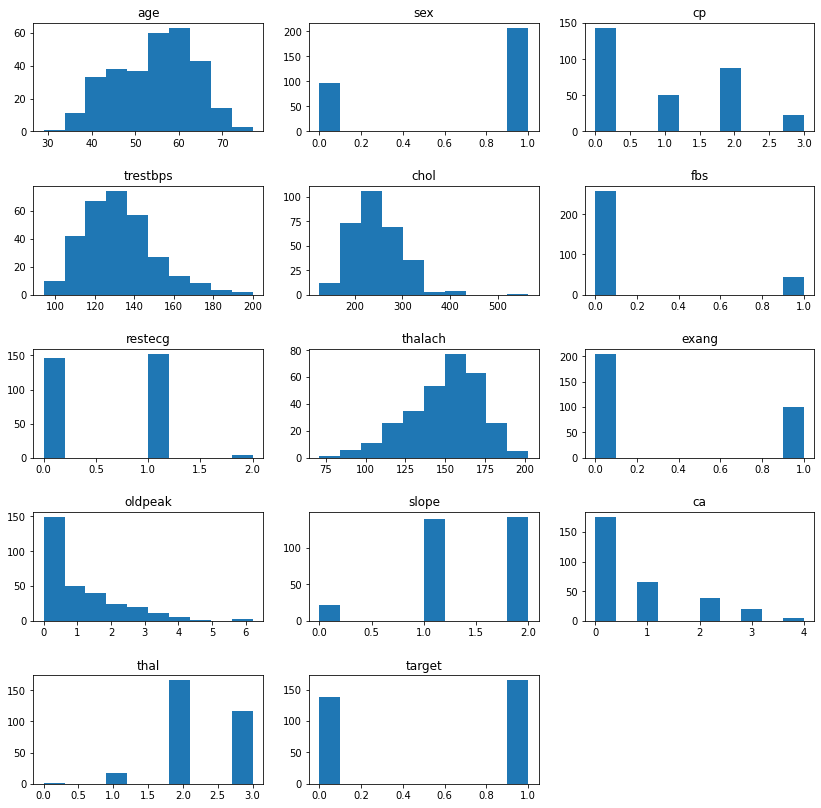

In [6]:
n_columns = len(data.columns)
plt.figure(figsize=(14,14))
plt.subplots_adjust(hspace=0.5)

for index, column in enumerate(data.columns):
    plt.subplot(n_columns//3 + 1, 3, index + 1 )
    plt.hist(data[column],)
    plt.title(column)
plt.show()


Baseline модель

In [7]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak' ]
target_feature = [ 'target' ]

In [8]:
categorical_pipeline = Pipeline(
        [
            ("impute", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
            ("one_hot", OneHotEncoder()),
        ]
    )

num_pipeline = Pipeline(
        [
            ("impute", SimpleImputer(missing_values=np.nan, strategy="mean")),
            ('scaler', StandardScaler())
        ]
    )

transformer = ColumnTransformer(
        [
            (
                "categorical_pipeline",
                categorical_pipeline,
                categorical_features,
            ),
            (
                "numerical_pipeline",
                num_pipeline,
                numerical_features,
            ),
        ]
    )

In [9]:
feature_data = data[categorical_features + numerical_features]
target_data = data[target_feature].values.ravel()

In [10]:
valid_size = 0.1
test_size = 0.1

X_data, X_valid, y_data, y_valid = train_test_split(feature_data, target_data, 
                                                    test_size = valid_size, 
                                                    random_state=42,
                                                    stratify = target_data)

X_data = transformer.fit_transform(X_data)
X_valid = transformer.transform(X_valid)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=test_size,
                                                    random_state=42,
                                                    stratify=y_data)

In [11]:
params = {
    'penalty': 'l2',
    'loss': 'squared_hinge',
    'dual': False,
    'tol': 1e-4,
    'C': 0.5,
    'multi_class': 'ovr',
    'fit_intercept': True    
}

model = LinearSVC(**params)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_valid = model.predict(X_valid)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)

f1_test = f1_score(y_test, y_pred_test, average='macro')
f1_valid = f1_score(y_valid, y_pred_valid, average='macro')

print('Test:')
print('\tAccuracy:\t', accuracy_test)
print('\tF1:\t\t', f1_test)
print('\nValid:')
print('\tAccuracy:\t', accuracy_valid)
print('\tF1:\t\t', f1_valid)

Test:
	Accuracy:	 0.9642857142857143
	F1:		 0.9638709677419355

Valid:
	Accuracy:	 0.8709677419354839
	F1:		 0.8675213675213675
